# <font color="cyan"> Part B: Customer Churn Prediction
Analyze the provided customer data ("Customer_data") to build a machine learning model that predicts customer churn. The analysis should include data exploration, preprocessing (handling missing values, encoding, scaling), model training, and evaluation using metrics like accuracy, precision, recall, and F1 score. The goal is to identify customers at high risk of churning to inform retention strategies.

## Load the data

### Subtask:
Load the customer data from the specified file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [8]:
import pandas as pd

df = pd.read_csv('Customer_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Explore and preprocess the data

### Subtask:
Perform exploratory data analysis, handle missing values, encode categorical features, and scale numerical features to prepare the data for modeling.


**Reasoning**:
Examine the data types and summary statistics, identify and handle missing values, identify and encode categorical features, and identify and scale numerical features to prepare the data for modeling.



In [9]:
# 1. Examine data types and summary statistics
display(df.info())
display(df.describe(include='all'))

# 2. Identify and handle missing values
# Check for missing values
display(df.isnull().sum())

# The 'TotalCharges' column has missing values.
# Since it's a numerical column, we can impute with the mean or median,
# or drop rows with missing values. Given the small number of missing values
# compared to the dataset size, dropping the rows is a reasonable approach.
df.dropna(inplace=True)

# Verify that missing values have been handled
display(df.isnull().sum())

# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where 'TotalCharges' became NaN after coercion (if any)
df.dropna(inplace=True)


# 3. Identify categorical features and apply one-hot encoding
categorical_features = df.select_dtypes(include='object').columns
# Exclude 'customerID' as it is an identifier
categorical_features = categorical_features.drop('customerID')

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 4. Identify numerical features and scale them
# Numerical features are now those that are not 'customerID' and are not boolean (from one-hot encoding)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,-0.440327,-1.280248,-1.161694,-0.994194,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,-0.440327,0.064303,-0.260878,-0.173740,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,-0.440327,-1.239504,-0.363923,-0.959649,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,-0.440327,0.512486,-0.747850,-0.195248,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,-0.440327,-1.239504,0.196178,-0.940457,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn_Yes', 'customerID'], axis=1)
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5625, 30)
Shape of X_test: (1407, 30)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


## Build and train a machine learning model

### Subtask:
Choose a suitable classification model (e.g., Logistic Regression, Random Forest, or Gradient Boosting) and train it on the training data.


**Reasoning**:
Import the LogisticRegression model, instantiate it, and train it using the training data.



In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics such as accuracy, precision, recall, and F1 score.


**Reasoning**:
Evaluate the trained model's performance on the testing data using appropriate metrics such as accuracy, precision, recall, and F1 score and print the results.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the trained model to predict churn on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7875
Precision: 0.6206
Recall: 0.5160
F1 Score: 0.5635


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained 7043 entries and 21 columns.
*   The 'TotalCharges' column had 11 missing values, which were handled by dropping the corresponding rows.
*   Categorical features were successfully one-hot encoded, and numerical features ('SeniorCitizen', 'tenure', 'MonthlyCharges', and 'TotalCharges') were scaled using `StandardScaler`.
*   The data was split into training (80%) and testing (20%) sets, resulting in 5625 training samples and 1407 testing samples.
*   A Logistic Regression model was trained on the preprocessed training data.
*   The trained model's performance on the test set was evaluated with the following metrics:
    *   Accuracy: 78.75%
    *   Precision: 62.06%
    *   Recall: 51.60%
    *   F1 Score: 56.35%

### Insights or Next Steps

*   The model demonstrates a reasonable overall accuracy, but the relatively lower recall suggests that it misses a significant portion of actual churn cases. For churn prediction, where identifying all potential churners is crucial for intervention, improving recall should be a focus.
*   Further steps could involve experimenting with different classification models (e.g., Random Forest, Gradient Boosting), optimizing hyperparameters, or exploring techniques to handle the class imbalance if it exists in the churn data to potentially improve the recall and overall performance.


## Visualize the data

### Subtask:
Create visualizations to explore the data and churn patterns.

**Reasoning**:
Visualize the distribution of the target variable and some key features, and the relationship between features and the target variable to gain insights about the data and churn patterns.

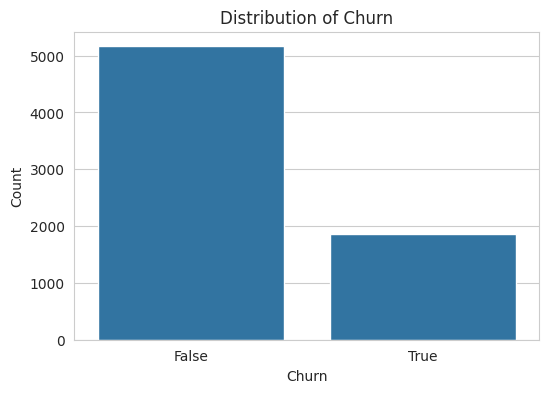

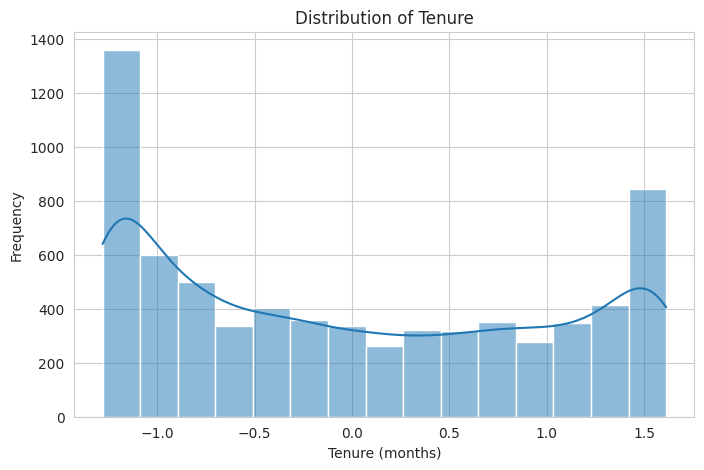

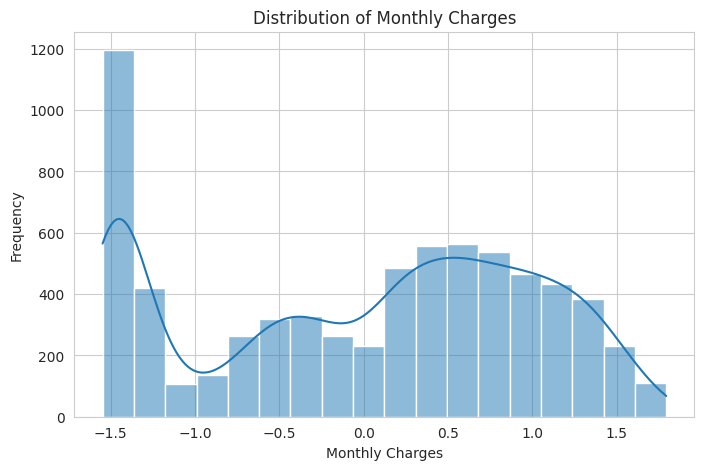

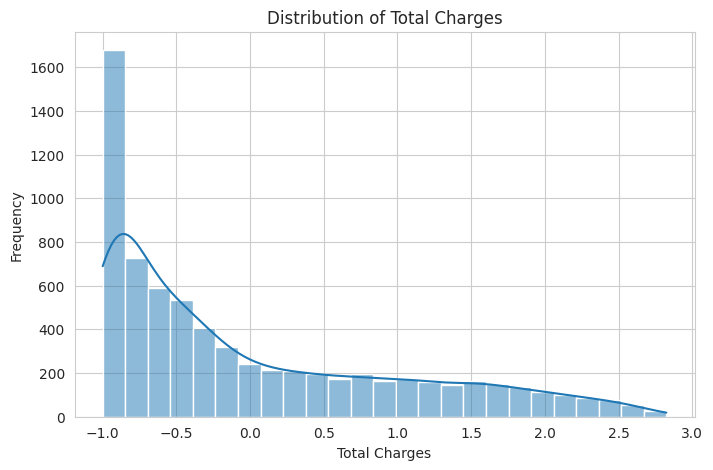

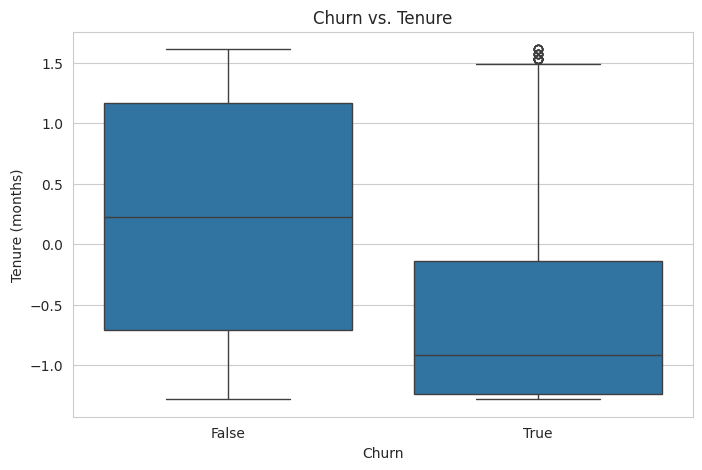

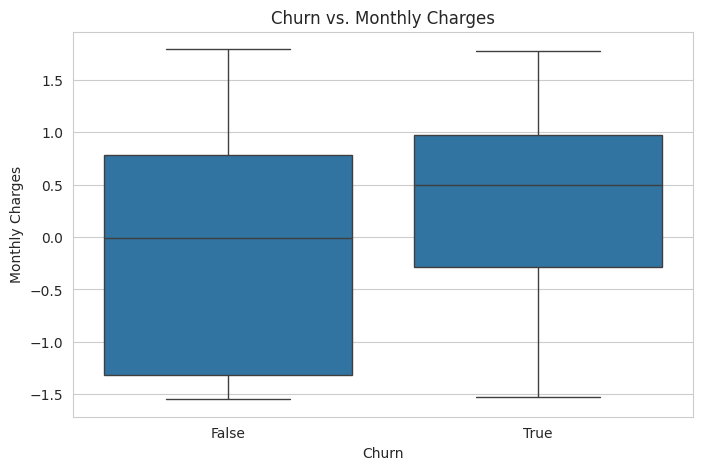

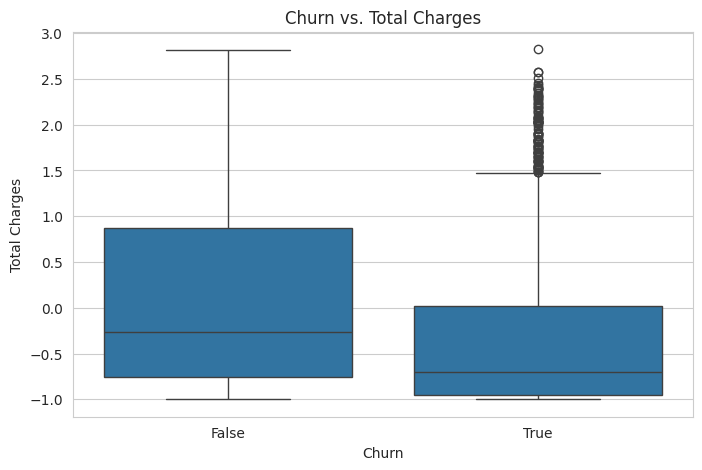

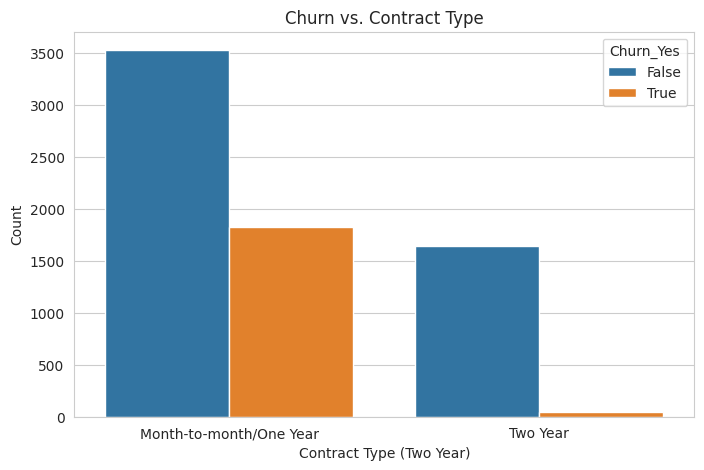

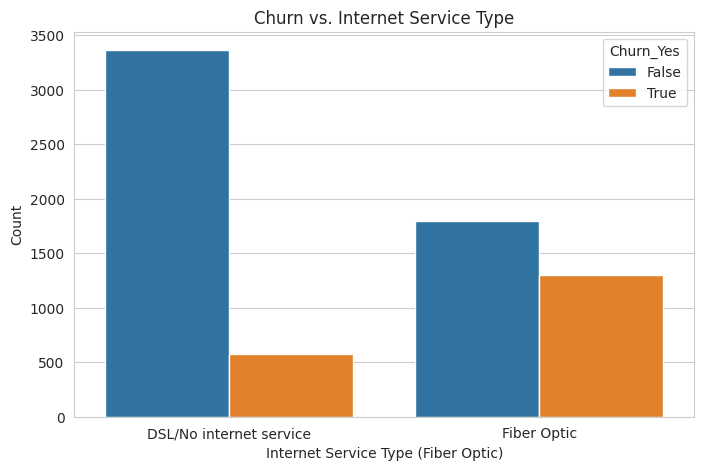

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Visualize the distribution of the target variable 'Churn_Yes'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn_Yes', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'tenure'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'MonthlyCharges'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'TotalCharges'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='TotalCharges', kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between 'tenure' and 'Churn_Yes'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn_Yes', y='tenure', data=df)
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

# Visualize the relationship between 'MonthlyCharges' and 'Churn_Yes'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Visualize the relationship between 'TotalCharges' and 'Churn_Yes'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn_Yes', y='TotalCharges', data=df)
plt.title('Churn vs. Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# Visualize the relationship between 'Contract' and 'Churn_Yes'
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract_Two year', hue='Churn_Yes', data=df)
plt.title('Churn vs. Contract Type')
plt.xlabel('Contract Type (Two Year)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Month-to-month/One Year', 'Two Year'])
plt.show()

# Visualize the relationship between 'InternetService' and 'Churn_Yes'
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService_Fiber optic', hue='Churn_Yes', data=df)
plt.title('Churn vs. Internet Service Type')
plt.xlabel('Internet Service Type (Fiber Optic)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['DSL/No internet service', 'Fiber Optic'])
plt.show()

Distribution of Churn: Comment on the balance of the target variable. Is there a significant class imbalance (more non-churners than churners)? This is important for choosing appropriate evaluation metrics and modeling techniques.
Distribution of Tenure, Monthly Charges, and Total Charges: Describe the shape of the distributions (e.g., skewed, normal) and any interesting patterns or outliers.
Churn vs. Tenure: Look at the boxplot to see if there's a noticeable difference in the tenure of customers who churn versus those who don't. Do customers who churn tend to have shorter or longer tenures?
Churn vs. Monthly Charges: Examine the boxplot for differences in monthly charges between churned and non-churned customers. Are customers with higher or lower monthly charges more likely to churn?
Churn vs. Total Charges: Similarly, look at the boxplot for differences in total charges. Do customers who churn tend to have lower or higher total charges?
Churn vs. Contract Type: Analyze the bar plot to see how different contract types relate to churn. Are customers with month-to-month contracts more likely to churn than those with one-year or two-year contracts?
Churn vs. Internet Service Type: Look at the bar plot to see if certain internet service types (DSL, Fiber optic, No internet service) have a higher proportion of churners.